Root at = -82.63173243106135
Root at = -46.987081631668495
Root at = -33.257474369147985
Root at = 14.11540741190338
Root at = 20.863833750358022
Root at = 51.030621219548046
Root at = 70.578037319942
z = 70.578037319942 g(z) = -9.170442183403793e-14


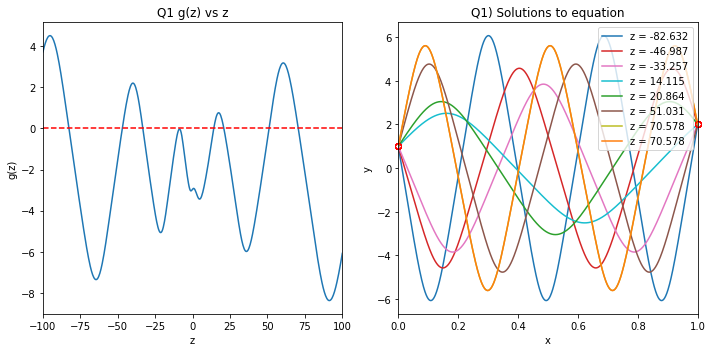

In [49]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------
#
# Define the problem.

nonlin = 1

def deriv2(x, y):
    if nonlin == 0:
        return -y[0]
    else:
        return -y[0] - 10*y[0]**3

# Boundary conditions.

BC_a = 0.0
BC_ya = 1.0
BC_b = 1.0
BC_yb = 2.0

# Integration step and bisection tolerance.

dx = 0.001
tol = 1.e-4

# Range to search for a solution.

if nonlin == 0:
    zlin = -1.0
    zrin = 5.0
else:
    zlin = -100.0
    zrin = 100.0

#-----------------------------------------------------------------------

def f(x, y):
    return np.array([y[1], deriv2(x, y)])

def rk4_step(func, x, y, dx):
    dy1 = dx*func(x, y)
    dy2 = dx*func(x+0.5*dx, y+0.5*dy1)
    dy3 = dx*func(x+0.5*dx, y+0.5*dy2)
    dy4 = dx*func(x+dx, y+dy3)
    y += (dy1 + 2*dy2 + 2*dy3 + dy4)/6.
    x += dx
    return x, y

def integrate(func, a, ya, ypa, b, dx):
    x = a
    y = np.array([ya, ypa])
    while x < b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
    return x, y
    
def g(z):
    x, y = integrate(f, BC_a, BC_ya, z, BC_b, dx)
    return y[0]-BC_yb

def bisect(func, zl, zr, tol):
    n = 0
    while zr-zl > tol:
        zm = 0.5*(zl + zr)
        if func(zm)*func(zl) > 0:
            zl = zm
        else:
            zr = zm
        n += 1

    return n,zl,zr

def secant1(g, zl, zr):
    gl = g(zl)
    gr = g(zr)
    return zl + (zr-zl)*(-gl)/(gr-gl)

def plotz(f, z):
    x = BC_a
    y = np.array([BC_ya, z])
    xx = [x]
    yy = [y[0]]
    while x < BC_b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
        xx.append(x)
        yy.append(y[0])
    plt.plot(xx, yy, label='z = {:.3f}'.format(z))
    plt.xlim(BC_a, BC_b)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot([BC_a], [BC_ya], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')
    plt.plot([BC_b], [BC_yb], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')

def main():

    zl = zlin
    zr = zrin

    n = 501
    zz = np.linspace(zl, zr, n)
    gg = np.zeros(n)
    for i in range(n):
        gg[i] = g(zz[i])

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(zz, gg)
    plt.plot([zl,zr], [0.,0.], 'r--')
    plt.xlim(zl, zr)
    plt.xlabel('z')
    plt.ylabel('g(z)')
    plt.title('Q1 g(z) vs z')

    # Adjust limits if they don't straddle a root.

#     gl = g(zl)
#     while gl*g(zr) > 0: zr -= 1

    i = 0
    temp_zl = zz[i]
    temp_gl = gg[i]
    temp_zr = 0
    temp_gr = 0
    root_list = []
    root_pos_list = []
    
    while i != (n-1):
        i += 1
#         print(temp_zl, zz[i], i, n)
        if (np.sign(gg[i]) != np.sign(temp_gl)):
            if gg[i] == 0:
                root_list.append(gg[i])
            else:
                
#                 print(temp_zl, val)
                temp_zr = zz[i]
                m,zzl,zzr = bisect(g, temp_zl, temp_zr, 1.e-6)
                zs = secant1(g, zzl, zzr)
                root_list.append(zs)    
                print('Root at =',zs)
            
            temp_zl = zz[i]
            temp_gl = gg[i]


    
#     for val in gg:
#         if (np.sign(temp_zl)) == np.sign(val)) and (val != 0):
#             pass
#         elif (np.sign(g(temp_zl)) != np.sign(val)) and (val != 0):
#             print(temp_zl, val)
#             temp_zr = val
#             n,zzl,zzr = bisect(g, temp_zl, temp_zr, 1.e-6)
#             zs = secant1(g, zzl, zzr)
#             root_list.append(zs)    
#             print('Root at =',zs)
#             temp_zl = val
#         else:
#             pass

    plt.subplot(1,2,2)
    #n,zzl,zzr = bisect(g, zl, zr, 1.e-6)
    #print "Root lies in (%f, %f) after %d iterations"%(zzl, zzr, n)
    #print "Function value =", g(0.5*(zzl+zzr))
    #zs = secant1(g, zzl, zzr)
    for z_i in root_list:
        plotz(f, z_i)
    print('z =', zs, 'g(z) =', g(zs))
    plotz(f, zs)
    plt.legend(loc='best')
    plt.title('Q1) Solutions to equation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()    
    plt.savefig('Q1.jpg')
    
main()

Question 2

In [41]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------
#
# Define the problem.

def U(x):
    if abs(x) < 1:
        return 0
    else:
        return U0

def deriv2(x, y):
    return -1*(y[2] - U(x))*y[0]				# y[2] is the eigenvalue z

# Boundary conditions.



BC_a = 0
BC_b = 1.0


# Integration step and bisection tolerance.

dx = 0.01
tol = 1.e-4

#

#-----------------------------------------------------------------------

def f(x, y):
    return np.array([y[1], deriv2(x, y), 0.]) 	# z' = 0

def rk4_step(func, x, y, dx):
    dy1 = dx*func(x, y)
    dy2 = dx*func(x+0.5*dx, y+0.5*dy1)
    dy3 = dx*func(x+0.5*dx, y+0.5*dy2)
    dy4 = dx*func(x+dx, y+dy3)
    y += (dy1 + 2*dy2 + 2*dy3 + dy4)/6.
    x += dx
    return x, y

def integrate(func, a, ya, ypa, z, b, dx):
    x = a
    y = np.array([ya, ypa, z])			# z is the eigenvalue
    while x < b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
    return x, y

def g(z):
    x, y = integrate(f, 0.0, parity, 1-parity, z, BC_b, dx)
    eta = np.sqrt(max((U0-z), 0))
    return y[1] + eta * y[0]

def bisect(func, zl, zr, tol):
    n = 0
    while zr-zl > tol:
#         print('zr = {}, zl = {}'.format(zr, zl))
        zm = 0.5*(zl + zr)
        if func(zm)*func(zl) > 0:
            zl = zm
        else:
            zr = zm
        n += 1

    return n,zl,zr

def secant1(g, zl, zr):
    gl = g(zl)
    gr = g(zr)
    
#     print('gl = {}, gr = {}'.format(gl, gr))
    return zl + (zr-zl)*(-gl)/(gr-gl)

def plotz(f, z):
    x = BC_a
    y = np.array([BC_ya, 1.0, z])
    xx = [x]
    yy = [y[0]]
    while x < BC_b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
        xx.append(x)
        yy.append(y[0])
    plt.plot(xx, yy, label='z = {:.3f}'.format(z))
    plt.xlim(BC_a, BC_b)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot([BC_a], [BC_ya], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')
    plt.plot([BC_b], [BC_yb], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')

def main():
    
    fig, ax = plt.subplots(1, 1, figsize = (10,10))
    ax.set(xlabel = 'U0', ylabel = 'z', title = 'Bound energy vs U0')
    parity_vals = [0.0, 1.0]
    
    
    global U0, parity
    U0_end = 100

    for val in parity_vals:
        parity = val
        U0 = 0.0
        
        while U0 < U0_end:
                    
            #Different Integrator        
            zl = 0
            zr = 1e-4
            temp_gl = g(zl)
            temp_gr = g(zr)

            while zr <= U0-.1/2:

                if np.sign(temp_gl) != np.sign(temp_gr):
                    if temp_gr == 0:
                        print('z =', zs, 'g(z) =', g(zs), 'For U0 = ',U0, 'With Parity = ',parity)
                        if parity == 1.0:
                            ax.plot(U0, zs, 'ko', markersize = 2, label = 'Parity = 1')
                        else:
                            ax.plot(U0, zs, 'go', markersize = 2, label = 'Parity = 0')

                    else:
                        m,zzl,zzr = bisect(g, zl, zr, 1.e-6)
                        zs = secant1(g, zzl, zzr)
                        print('z =', zs, 'g(z) =', g(zs), 'For U0 = ',U0, 'With Parity = ',parity)

                        if parity == 1.0:
                            ax.plot(U0, zs, 'ko', markersize = 2, label = 'Parity = 1')
                        else:
                            ax.plot(U0, zs, 'go', markersize = 2, label = 'Parity = 0')
                    zl = zr
                    zr = zl + .1
                    temp_gl = temp_gr

                else:
                    zr += .1
                    temp_gr = g(zr)
            U0 += .1
            
            #Different Integrator

#             zl = 0.0
#             zr = U0
            
#             n = 500
#             zz = np.linspace(zl, zr, n)
#             gg = np.zeros(n)
#             for i in range(n):
#                 gg[i] = g(zz[i])

#             i = 0

#             temp_zl = zz[i]
#             temp_gl = gg[i]
#             temp_zr = 0
#             temp_gr = 0
#             root_list = []
#             root_pos_list = []


#             while i != n-1:   
#                 i += 1
#                 if (np.sign(gg[i]) != np.sign(temp_gl)):
#                     if gg[i] == 0:
#                         print('z =', zs, 'g(z) =', g(zs), 'For U0 = ',U0, 'With Parity = ',parity)
#                         if parity == 1.0:
#                             ax.plot(U0, zs, 'ko', markersize = 2, label = 'Parity = 1')
#                         else:
#                             ax.plot(U0, zs, 'go', markersize = 2, label = 'Parity = 0')
#                     else:
#                         temp_zr = zz[i]
#                         m,zzl,zzr = bisect(g, temp_zl, temp_zr, 1.e-6)
#                         zs = secant1(g, zzl, zzr)
#                         print('z =', zs, 'g(z) =', g(zs), 'For U0 = ',U0, 'With Parity = ',parity)
                        
#                         if parity == 1.0:
#                             ax.plot(U0, zs, 'ko', markersize = 2, label = 'Parity = 1')
#                         else:
#                             ax.plot(U0, zs, 'go', markersize = 2, label = 'Parity = 0')




#                     temp_zl = zz[i]
#                     temp_gl = gg[i]
        
 
           ###Other Integrator     
            

    #             zl = 0.0
    #             zr = U0

    #             while True:
    #                 n,zzl,zzr = bisect(g, zl, zr, 1.e-6)

    #                 if abs(U0 - zzl)  < tol:
    # #                     print('The left side has reached max energy')
    #                     break

    #                 zs = secant1(g, zzl, zzr)

    #                 if parity == 1.0:
    #                     ax.plot(U0, zs, 'ko', markersize = 2, label = 'Parity = 1')
    #                 else:
    #                     ax.plot(U0, zs, 'go', markersize = 2, label = 'Parity = 0')

    #                 print('z =', zs, 'g(z) =', g(zs), 'For U0 = ',U0, 'With Parity = ',parity)
    #                 zl = zs + 10e-6

#             U0 += .1
            
    ax.legend()
    plt.savefig('Q2.jpg')
    


z = 3.0920680026977285 g(z) = 4.368727601899991e-14 For U0 =  3.2000000000000015 With Parity =  0.0
z = 3.163447360208747 g(z) = 8.826273045769994e-14 For U0 =  3.3000000000000016 With Parity =  0.0
z = 3.232182233481158 g(z) = 2.4702462297909733e-14 For U0 =  3.4000000000000017 With Parity =  0.0
z = 3.2984417213597026 g(z) = 8.43769498715119e-14 For U0 =  3.5000000000000018 With Parity =  0.0
z = 3.362379739924408 g(z) = 1.432187701766452e-14 For U0 =  3.600000000000002 With Parity =  0.0
z = 3.424136759290897 g(z) = 4.7628567756419216e-14 For U0 =  3.700000000000002 With Parity =  0.0
z = 3.483841301119931 g(z) = 3.8191672047105385e-14 For U0 =  3.800000000000002 With Parity =  0.0
z = 3.541611235119698 g(z) = 3.0309088572266774e-14 For U0 =  3.900000000000002 With Parity =  0.0
z = 3.5975549058953833 g(z) = 1.2212453270876722e-14 For U0 =  4.000000000000002 With Parity =  0.0
z = 3.6517721159572987 g(z) = 1.1046719095020308e-14 For U0 =  4.100000000000001 With Parity =  0.0
z = 3.7

z = 5.622625281107722 g(z) = -6.217248937900877e-15 For U0 =  11.499999999999975 With Parity =  0.0
z = 5.636839308244439 g(z) = -4.107825191113079e-15 For U0 =  11.599999999999975 With Parity =  0.0
z = 5.6508947561052745 g(z) = -5.329070518200751e-15 For U0 =  11.699999999999974 With Parity =  0.0
z = 5.664794679781964 g(z) = -5.218048215738236e-15 For U0 =  11.799999999999974 With Parity =  0.0
z = 5.678542050770593 g(z) = -8.881784197001252e-16 For U0 =  11.899999999999974 With Parity =  0.0
z = 5.692139759929323 g(z) = -4.884981308350689e-15 For U0 =  11.999999999999973 With Parity =  0.0
z = 5.7055906203079125 g(z) = -4.773959005888173e-15 For U0 =  12.099999999999973 With Parity =  0.0
z = 5.718897369855925 g(z) = -4.6629367034256575e-15 For U0 =  12.199999999999973 With Parity =  0.0
z = 5.732062674015447 g(z) = -5.773159728050814e-15 For U0 =  12.299999999999972 With Parity =  0.0
z = 5.745089128204287 g(z) = -5.440092820663267e-15 For U0 =  12.399999999999972 With Parity =  0

z = 6.444784799032029 g(z) = -4.3298697960381105e-15 For U0 =  19.80000000000001 With Parity =  0.0
z = 6.451763336099231 g(z) = -4.218847493575595e-15 For U0 =  19.900000000000013 With Parity =  0.0
z = 6.458695518487514 g(z) = -1.1102230246251565e-15 For U0 =  20.000000000000014 With Parity =  0.0
z = 6.46558187567996 g(z) = -3.552713678800501e-15 For U0 =  20.100000000000016 With Parity =  0.0
z = 6.472422928570409 g(z) = -4.551914400963142e-15 For U0 =  20.200000000000017 With Parity =  0.0
z = 6.479219189643936 g(z) = -6.439293542825908e-15 For U0 =  20.30000000000002 With Parity =  0.0
z = 6.485971163152589 g(z) = -5.995204332975845e-15 For U0 =  20.40000000000002 With Parity =  0.0
z = 6.492679345286705 g(z) = -7.216449660063518e-15 For U0 =  20.50000000000002 With Parity =  0.0
z = 6.499344224341738 g(z) = -6.106226635438361e-15 For U0 =  20.600000000000023 With Parity =  0.0
z = 6.505966280880986 g(z) = -5.88418203051333e-15 For U0 =  20.700000000000024 With Parity =  0.0
z = 

z = 24.350098247184626 g(z) = -1.1934897514720433e-15 For U0 =  25.500000000000092 With Parity =  0.0
z = 6.786282625121138 g(z) = -3.219646771412954e-15 For U0 =  25.600000000000094 With Parity =  0.0
z = 24.395892403224106 g(z) = -1.582067810090848e-15 For U0 =  25.600000000000094 With Parity =  0.0
z = 6.791242589459128 g(z) = -8.548717289613705e-15 For U0 =  25.700000000000095 With Parity =  0.0
z = 24.441055301205008 g(z) = -5.551115123125783e-16 For U0 =  25.700000000000095 With Parity =  0.0
z = 6.796176800247862 g(z) = -6.661338147750939e-15 For U0 =  25.800000000000097 With Parity =  0.0
z = 24.485606843458786 g(z) = -8.604228440844963e-16 For U0 =  25.800000000000097 With Parity =  0.0
z = 6.801085486915623 g(z) = -5.88418203051333e-15 For U0 =  25.900000000000098 With Parity =  0.0
z = 24.52956588294993 g(z) = -5.273559366969494e-16 For U0 =  25.900000000000098 With Parity =  0.0
z = 6.805968875989487 g(z) = -6.994405055138486e-15 For U0 =  26.0000000000001 With Parity =  0.

z = 6.970706924007349 g(z) = -7.438494264988549e-15 For U0 =  29.700000000000152 With Parity =  0.0
z = 25.882744152664426 g(z) = 5.551115123125783e-17 For U0 =  29.700000000000152 With Parity =  0.0
z = 6.974772383153214 g(z) = -8.659739592076221e-15 For U0 =  29.800000000000153 With Parity =  0.0
z = 25.912156270855043 g(z) = 1.6653345369377348e-16 For U0 =  29.800000000000153 With Parity =  0.0
z = 6.978819540727172 g(z) = -8.770761894538737e-15 For U0 =  29.900000000000155 With Parity =  0.0
z = 25.94132655677538 g(z) = 3.3306690738754696e-16 For U0 =  29.900000000000155 With Parity =  0.0
z = 6.982848537898748 g(z) = -8.659739592076221e-15 For U0 =  30.000000000000156 With Parity =  0.0
z = 25.970259037964077 g(z) = 4.440892098500626e-16 For U0 =  30.000000000000156 With Parity =  0.0
z = 6.9868595142923935 g(z) = -5.551115123125783e-15 For U0 =  30.100000000000158 With Parity =  0.0
z = 25.998957633403947 g(z) = 1.1102230246251565e-16 For U0 =  30.100000000000158 With Parity =  0

z = 26.92467149066075 g(z) = 1.6653345369377348e-16 For U0 =  33.80000000000021 With Parity =  0.0
z = 7.127163064629928 g(z) = -9.880984919163893e-15 For U0 =  33.90000000000021 With Parity =  0.0
z = 26.94662040073089 g(z) = 7.771561172376096e-16 For U0 =  33.90000000000021 With Parity =  0.0
z = 7.130565831249622 g(z) = -1.7763568394002505e-15 For U0 =  34.00000000000021 With Parity =  0.0
z = 26.96843344695694 g(z) = 5.551115123125783e-17 For U0 =  34.00000000000021 With Parity =  0.0
z = 7.1339551097082055 g(z) = -8.881784197001252e-15 For U0 =  34.100000000000215 With Parity =  0.0
z = 26.990112231711727 g(z) = -1.6653345369377348e-16 For U0 =  34.100000000000215 With Parity =  0.0
z = 7.13733099150781 g(z) = -7.438494264988549e-15 For U0 =  34.200000000000216 With Parity =  0.0
z = 27.011658327832308 g(z) = 2.7755575615628914e-16 For U0 =  34.200000000000216 With Parity =  0.0
z = 7.140693567270195 g(z) = -8.548717289613705e-15 For U0 =  34.30000000000022 With Parity =  0.0
z = 

z = 7.256509984917987 g(z) = -9.769962616701378e-15 For U0 =  38.00000000000027 With Parity =  0.0
z = 27.745173268279917 g(z) = 2.220446049250313e-16 For U0 =  38.00000000000027 With Parity =  0.0
z = 7.259426380891959 g(z) = -1.0769163338864018e-14 For U0 =  38.10000000000027 With Parity =  0.0
z = 27.762524378990737 g(z) = 2.220446049250313e-16 For U0 =  38.10000000000027 With Parity =  0.0
z = 7.262332420315265 g(z) = -1.4432899320127035e-15 For U0 =  38.20000000000027 With Parity =  0.0
z = 27.77978806629812 g(z) = 4.440892098500626e-16 For U0 =  38.20000000000027 With Parity =  0.0
z = 7.265228166065904 g(z) = -9.547918011776346e-15 For U0 =  38.300000000000274 With Parity =  0.0
z = 27.79696514029062 g(z) = 0.0 For U0 =  38.300000000000274 With Parity =  0.0
z = 7.268113680480501 g(z) = -6.661338147750939e-15 For U0 =  38.400000000000276 With Parity =  0.0
z = 27.814056399629152 g(z) = -1.1102230246251565e-16 For U0 =  38.400000000000276 With Parity =  0.0
z = 7.270989025360521 

z = 7.370747612637773 g(z) = -7.771561172376096e-15 For U0 =  42.20000000000033 With Parity =  0.0
z = 28.406832781776146 g(z) = -3.3306690738754696e-16 For U0 =  42.20000000000033 With Parity =  0.0
z = 7.373277569088159 g(z) = -9.547918011776346e-15 For U0 =  42.30000000000033 With Parity =  0.0
z = 28.421099284659363 g(z) = 0.0 For U0 =  42.30000000000033 With Parity =  0.0
z = 7.375799404870387 g(z) = -8.881784197001252e-15 For U0 =  42.40000000000033 With Parity =  0.0
z = 28.435304593954527 g(z) = 7.771561172376096e-16 For U0 =  42.40000000000033 With Parity =  0.0
z = 7.378313164507097 g(z) = -4.773959005888173e-15 For U0 =  42.500000000000334 With Parity =  0.0
z = 28.449449182077153 g(z) = -1.1102230246251565e-16 For U0 =  42.500000000000334 With Parity =  0.0
z = 7.380818892174972 g(z) = -8.992806499463768e-15 For U0 =  42.600000000000335 With Parity =  0.0
z = 28.463533515990857 g(z) = 5.551115123125783e-16 For U0 =  42.600000000000335 With Parity =  0.0
z = 7.38331663170813

z = 7.470489033631995 g(z) = -5.10702591327572e-15 For U0 =  46.40000000000039 With Parity =  0.0
z = 28.95821611733085 g(z) = -4.440892098500626e-16 For U0 =  46.40000000000039 With Parity =  0.0
z = 7.472712640212668 g(z) = -6.661338147750939e-15 For U0 =  46.50000000000039 With Parity =  0.0
z = 28.970264960991138 g(z) = 5.551115123125783e-16 For U0 =  46.50000000000039 With Parity =  0.0
z = 7.474929733819022 g(z) = -3.1086244689504383e-15 For U0 =  46.60000000000039 With Parity =  0.0
z = 28.982268578937262 g(z) = -2.220446049250313e-16 For U0 =  46.60000000000039 With Parity =  0.0
z = 7.477140347008429 g(z) = -1.0880185641326534e-14 For U0 =  46.700000000000394 With Parity =  0.0
z = 28.994227272420122 g(z) = 7.771561172376096e-16 For U0 =  46.700000000000394 With Parity =  0.0
z = 7.479344512107611 g(z) = -8.326672684688674e-15 For U0 =  46.800000000000395 With Parity =  0.0
z = 29.00614133972886 g(z) = 3.3306690738754696e-16 For U0 =  46.800000000000395 With Parity =  0.0
z = 

z = 7.558622467927709 g(z) = -5.995204332975845e-15 For U0 =  50.60000000000045 With Parity =  0.0
z = 29.428485291261783 g(z) = 3.3306690738754696e-16 For U0 =  50.60000000000045 With Parity =  0.0
z = 7.56059813210803 g(z) = -6.661338147750939e-15 For U0 =  50.70000000000045 With Parity =  0.0
z = 29.438863922237555 g(z) = 3.3306690738754696e-16 For U0 =  50.70000000000045 With Parity =  0.0
z = 7.562568474030392 g(z) = -9.547918011776346e-15 For U0 =  50.80000000000045 With Parity =  0.0
z = 29.449207816306824 g(z) = 0.0 For U0 =  50.80000000000045 With Parity =  0.0
z = 7.564533518145976 g(z) = -1.0436096431476471e-14 For U0 =  50.90000000000045 With Parity =  0.0
z = 29.459517177792172 g(z) = 6.661338147750939e-16 For U0 =  50.90000000000045 With Parity =  0.0
z = 7.566493288746858 g(z) = -1.0547118733938987e-14 For U0 =  51.000000000000455 With Parity =  0.0
z = 29.46979220925841 g(z) = 2.220446049250313e-16 For U0 =  51.000000000000455 With Parity =  0.0
z = 7.568447809967323 g(

z = 7.637281860619454 g(z) = -1.1102230246251565e-15 For U0 =  54.80000000000051 With Parity =  0.0
z = 29.836643971320154 g(z) = -1.1102230246251565e-16 For U0 =  54.80000000000051 With Parity =  0.0
z = 7.639053354816587 g(z) = -5.662137425588298e-15 For U0 =  54.90000000000051 With Parity =  0.0
z = 29.84572143157801 g(z) = 4.440892098500626e-16 For U0 =  54.90000000000051 With Parity =  0.0
z = 7.640820430673082 g(z) = -3.552713678800501e-15 For U0 =  55.00000000000051 With Parity =  0.0
z = 29.854771426077757 g(z) = 7.771561172376096e-16 For U0 =  55.00000000000051 With Parity =  0.0
z = 7.64258310696927 g(z) = -8.992806499463768e-15 For U0 =  55.10000000000051 With Parity =  0.0
z = 29.863794099844743 g(z) = -3.3306690738754696e-16 For U0 =  55.10000000000051 With Parity =  0.0
z = 7.644341402372398 g(z) = -1.0103029524088925e-14 For U0 =  55.200000000000514 With Parity =  0.0
z = 29.872789596791783 g(z) = 0.0 For U0 =  55.200000000000514 With Parity =  0.0
z = 7.646095335437576 

z = 7.708084078006347 g(z) = -1.2434497875801753e-14 For U0 =  59.00000000000057 With Parity =  0.0
z = 30.19579858877772 g(z) = -3.3306690738754696e-16 For U0 =  59.00000000000057 With Parity =  0.0
z = 7.709684965882364 g(z) = -8.659739592076221e-15 For U0 =  59.10000000000057 With Parity =  0.0
z = 30.203835738418096 g(z) = 1.1102230246251565e-16 For U0 =  59.10000000000057 With Parity =  0.0
z = 7.711282136103066 g(z) = -2.7755575615628914e-15 For U0 =  59.20000000000057 With Parity =  0.0
z = 30.21185067109217 g(z) = -1.1102230246251565e-16 For U0 =  59.20000000000057 With Parity =  0.0
z = 7.71287560337228 g(z) = -9.992007221626409e-15 For U0 =  59.30000000000057 With Parity =  0.0
z = 30.219843493413883 g(z) = 5.551115123125783e-16 For U0 =  59.30000000000057 With Parity =  0.0
z = 7.714465382311435 g(z) = -1.0103029524088925e-14 For U0 =  59.400000000000574 With Parity =  0.0
z = 30.227814311257596 g(z) = 2.220446049250313e-16 For U0 =  59.400000000000574 With Parity =  0.0
z =

z = 7.769357944175832 g(z) = -1.2989609388114332e-14 For U0 =  63.000000000000625 With Parity =  0.0
z = 30.500945281478565 g(z) = 1.1102230246251565e-16 For U0 =  63.000000000000625 With Parity =  0.0
z = 62.79463225152995 g(z) = 2.9733160378242474e-14 For U0 =  63.000000000000625 With Parity =  0.0
z = 7.7708208325835155 g(z) = -8.104628079763643e-15 For U0 =  63.10000000000063 With Parity =  0.0
z = 30.50817017701008 g(z) = 1.1102230246251565e-16 For U0 =  63.10000000000063 With Parity =  0.0
z = 62.862439855044954 g(z) = 2.2724877535296173e-14 For U0 =  63.10000000000063 With Parity =  0.0
z = 7.772280532711834 g(z) = -1.1879386363489175e-14 For U0 =  63.20000000000063 With Parity =  0.0
z = 30.51537660382509 g(z) = 0.0 For U0 =  63.20000000000063 With Parity =  0.0
z = 62.9286885982418 g(z) = 1.4085954624931674e-14 For U0 =  63.20000000000063 With Parity =  0.0
z = 7.773737056388863 g(z) = -1.1102230246251565e-16 For U0 =  63.30000000000063 With Parity =  0.0
z = 30.52256464356460

z = 7.809151167361501 g(z) = -9.547918011776346e-15 For U0 =  65.80000000000054 With Parity =  0.0
z = 30.696518407476205 g(z) = 7.771561172376096e-16 For U0 =  65.80000000000054 With Parity =  0.0
z = 64.30138820315202 g(z) = -5.551115123125783e-17 For U0 =  65.80000000000054 With Parity =  0.0
z = 7.810529059807386 g(z) = -1.2656542480726785e-14 For U0 =  65.90000000000053 With Parity =  0.0
z = 30.70325542152651 g(z) = -3.3306690738754696e-16 For U0 =  65.90000000000053 With Parity =  0.0
z = 64.34511839076126 g(z) = -2.220446049250313e-16 For U0 =  65.90000000000053 With Parity =  0.0
z = 7.811904072997169 g(z) = -1.354472090042691e-14 For U0 =  66.00000000000053 With Parity =  0.0
z = 30.709976069743902 g(z) = 5.551115123125783e-16 For U0 =  66.00000000000053 With Parity =  0.0
z = 64.38837362763806 g(z) = 5.551115123125783e-16 For U0 =  66.00000000000053 With Parity =  0.0
z = 7.813276217168556 g(z) = -1.1324274851176597e-14 For U0 =  66.10000000000052 With Parity =  0.0
z = 30.7

z = 65.34589091584697 g(z) = 7.216449660063518e-16 For U0 =  68.50000000000038 With Parity =  0.0
z = 7.846676312949559 g(z) = -5.329070518200751e-15 For U0 =  68.60000000000038 With Parity =  0.0
z = 30.879185090642608 g(z) = 3.3306690738754696e-16 For U0 =  68.60000000000038 With Parity =  0.0
z = 65.38015824419479 g(z) = 2.220446049250313e-16 For U0 =  68.60000000000038 With Parity =  0.0
z = 7.847977293923179 g(z) = -9.547918011776346e-15 For U0 =  68.70000000000037 With Parity =  0.0
z = 30.88548850149833 g(z) = 7.771561172376096e-16 For U0 =  68.70000000000037 With Parity =  0.0
z = 65.41416952800073 g(z) = 2.7755575615628914e-16 For U0 =  68.70000000000037 With Parity =  0.0
z = 7.849275663869615 g(z) = -2.4424906541753444e-15 For U0 =  68.80000000000037 With Parity =  0.0
z = 30.891777321152414 g(z) = 3.3306690738754696e-16 For U0 =  68.80000000000037 With Parity =  0.0
z = 65.4479294351376 g(z) = -4.718447854656915e-16 For U0 =  68.80000000000037 With Parity =  0.0
z = 7.85057

z = 66.22144469400064 g(z) = -5.551115123125783e-17 For U0 =  71.30000000000022 With Parity =  0.0
z = 7.8821451574485115 g(z) = -3.219646771412954e-15 For U0 =  71.40000000000022 With Parity =  0.0
z = 31.05034909959824 g(z) = 6.661338147750939e-16 For U0 =  71.40000000000022 With Parity =  0.0
z = 66.2499368240938 g(z) = -4.440892098500626e-16 For U0 =  71.40000000000022 With Parity =  0.0
z = 7.883376263311964 g(z) = -5.218048215738236e-15 For U0 =  71.50000000000021 With Parity =  0.0
z = 31.056264902919857 g(z) = 3.3306690738754696e-16 For U0 =  71.50000000000021 With Parity =  0.0
z = 66.27826433560814 g(z) = 0.0 For U0 =  71.50000000000021 With Parity =  0.0
z = 7.884604992298086 g(z) = -6.5503158452884236e-15 For U0 =  71.60000000000021 With Parity =  0.0
z = 31.06216762569144 g(z) = 2.220446049250313e-16 For U0 =  71.60000000000021 With Parity =  0.0
z = 66.30642943482891 g(z) = 6.661338147750939e-16 For U0 =  71.60000000000021 With Parity =  0.0
z = 7.885831352210291 g(z) = -

z = 66.96334125822162 g(z) = -4.996003610813204e-16 For U0 =  74.10000000000007 With Parity =  0.0
z = 7.915742504704959 g(z) = -7.771561172376096e-15 For U0 =  74.20000000000006 With Parity =  0.0
z = 31.211204685205967 g(z) = 7.771561172376096e-16 For U0 =  74.20000000000006 With Parity =  0.0
z = 66.98792200203063 g(z) = -6.661338147750939e-16 For U0 =  74.20000000000006 With Parity =  0.0
z = 7.91690989326408 g(z) = -3.552713678800501e-15 For U0 =  74.30000000000005 With Parity =  0.0
z = 31.21677218031535 g(z) = -6.661338147750939e-16 For U0 =  74.30000000000005 With Parity =  0.0
z = 67.01238520266776 g(z) = 5.551115123125783e-17 For U0 =  74.30000000000005 With Parity =  0.0
z = 7.918075110422902 g(z) = -1.099120794378905e-14 For U0 =  74.40000000000005 With Parity =  0.0
z = 31.22232789084205 g(z) = 9.992007221626409e-16 For U0 =  74.40000000000005 With Parity =  0.0
z = 67.03673211025267 g(z) = -7.771561172376096e-16 For U0 =  74.40000000000005 With Parity =  0.0
z = 7.9192381

z = 67.6108596792686 g(z) = 1.1102230246251565e-16 For U0 =  76.8999999999999 With Parity =  0.0
z = 7.947630475891957 g(z) = -1.354472090042691e-14 For U0 =  76.9999999999999 With Parity =  0.0
z = 31.36277584970134 g(z) = -1.1102230246251565e-16 For U0 =  76.9999999999999 With Parity =  0.0
z = 67.63255880829936 g(z) = 3.885780586188048e-16 For U0 =  76.9999999999999 With Parity =  0.0
z = 7.948739563458254 g(z) = -1.0325074129013956e-14 For U0 =  77.0999999999999 With Parity =  0.0
z = 31.36802886408154 g(z) = 4.440892098500626e-16 For U0 =  77.0999999999999 With Parity =  0.0
z = 67.65416851229014 g(z) = 2.220446049250313e-16 For U0 =  77.0999999999999 With Parity =  0.0
z = 7.949846660817814 g(z) = -9.43689570931383e-15 For U0 =  77.19999999999989 With Parity =  0.0
z = 31.373271213491794 g(z) = 1.1102230246251565e-16 For U0 =  77.19999999999989 With Parity =  0.0
z = 67.67568958274838 g(z) = -7.216449660063518e-16 For U0 =  77.19999999999989 With Parity =  0.0
z = 7.9509517740398

z = 68.18700930972835 g(z) = -3.3306690738754696e-16 For U0 =  79.69999999999975 With Parity =  0.0
z = 7.977951990401838 g(z) = -1.4765966227514582e-14 For U0 =  79.79999999999974 With Parity =  0.0
z = 31.50594684589856 g(z) = -7.771561172376096e-16 For U0 =  79.79999999999974 With Parity =  0.0
z = 68.2064700561874 g(z) = -3.3306690738754696e-16 For U0 =  79.79999999999974 With Parity =  0.0
z = 7.979007563485077 g(z) = -9.2148511043888e-15 For U0 =  79.89999999999974 With Parity =  0.0
z = 31.510914692809443 g(z) = 3.3306690738754696e-16 For U0 =  79.89999999999974 With Parity =  0.0
z = 68.22585982606584 g(z) = -3.3306690738754696e-16 For U0 =  79.89999999999974 With Parity =  0.0
z = 7.980061306863479 g(z) = -7.993605777301127e-15 For U0 =  79.99999999999973 With Parity =  0.0
z = 31.515872848179132 g(z) = 4.440892098500626e-16 For U0 =  79.99999999999973 With Parity =  0.0
z = 68.24517915938047 g(z) = 3.3306690738754696e-16 For U0 =  79.99999999999973 With Parity =  0.0
z = 7.98

z = 68.70672285569567 g(z) = 7.216449660063518e-16 For U0 =  82.49999999999959 With Parity =  0.0
z = 8.006833612570112 g(z) = -1.3766765505351941e-14 For U0 =  82.59999999999958 With Parity =  0.0
z = 31.64148616056912 g(z) = 9.992007221626409e-16 For U0 =  82.59999999999958 With Parity =  0.0
z = 68.72438049186562 g(z) = -3.3306690738754696e-16 For U0 =  82.59999999999958 With Parity =  0.0
z = 8.007839919587315 g(z) = -9.103828801926284e-15 For U0 =  82.69999999999958 With Parity =  0.0
z = 31.646194396748598 g(z) = 4.440892098500626e-16 For U0 =  82.69999999999958 With Parity =  0.0
z = 68.7419800643961 g(z) = -3.3306690738754696e-16 For U0 =  82.69999999999958 With Parity =  0.0
z = 8.008844539670335 g(z) = -7.549516567451064e-15 For U0 =  82.79999999999957 With Parity =  0.0
z = 31.6508937926435 g(z) = 6.661338147750939e-16 For U0 =  82.79999999999957 With Parity =  0.0
z = 68.75952196198656 g(z) = -5.551115123125783e-17 For U0 =  82.79999999999957 With Parity =  0.0
z = 8.009847

z = 69.18038137063485 g(z) = 5.551115123125783e-16 For U0 =  85.29999999999943 With Parity =  0.0
z = 8.034387896821208 g(z) = -1.27675647831893e-14 For U0 =  85.39999999999942 With Parity =  0.0
z = 31.770065585572375 g(z) = 4.440892098500626e-16 For U0 =  85.39999999999942 With Parity =  0.0
z = 69.19654751911357 g(z) = 3.3306690738754696e-16 For U0 =  85.39999999999942 With Parity =  0.0
z = 8.035348723927083 g(z) = -1.432187701766452e-14 For U0 =  85.49999999999942 With Parity =  0.0
z = 31.77453661711606 g(z) = 1.4432899320127035e-15 For U0 =  85.49999999999942 With Parity =  0.0
z = 69.21266507889472 g(z) = 8.881784197001252e-16 For U0 =  85.49999999999942 With Parity =  0.0
z = 8.036307991594745 g(z) = -7.549516567451064e-15 For U0 =  85.59999999999941 With Parity =  0.0
z = 31.77899955676189 g(z) = 3.3306690738754696e-16 For U0 =  85.59999999999941 With Parity =  0.0
z = 69.22873434122104 g(z) = -5.551115123125783e-16 For U0 =  85.59999999999941 With Parity =  0.0
z = 8.0372657

z = 69.61556713463298 g(z) = -2.220446049250313e-16 For U0 =  88.09999999999927 With Parity =  0.0
z = 8.060715332761701 g(z) = -1.4654943925052066e-14 For U0 =  88.19999999999926 With Parity =  0.0
z = 31.892275536741984 g(z) = -6.661338147750939e-16 For U0 =  88.19999999999926 With Parity =  0.0
z = 69.63047441154848 g(z) = 7.771561172376096e-16 For U0 =  88.19999999999926 With Parity =  0.0
z = 8.061634066960202 g(z) = -1.3322676295501878e-15 For U0 =  88.29999999999926 With Parity =  0.0
z = 31.89652910824517 g(z) = 5.551115123125783e-16 For U0 =  88.29999999999926 With Parity =  0.0
z = 69.64534030584633 g(z) = 5.551115123125783e-16 For U0 =  88.29999999999926 With Parity =  0.0
z = 8.062551355993193 g(z) = -2.6645352591003757e-15 For U0 =  88.39999999999925 With Parity =  0.0
z = 31.90077524902565 g(z) = -4.440892098500626e-16 For U0 =  88.39999999999925 With Parity =  0.0
z = 69.66016504265126 g(z) = 3.885780586188048e-16 For U0 =  88.39999999999925 With Parity =  0.0
z = 8.0634

z = 70.01802802053133 g(z) = 2.7755575615628914e-16 For U0 =  90.89999999999911 With Parity =  0.0
z = 8.085905968695508 g(z) = -1.4432899320127035e-14 For U0 =  90.9999999999991 With Parity =  0.0
z = 32.008637472358295 g(z) = -4.440892098500626e-16 For U0 =  90.9999999999991 With Parity =  0.0
z = 70.03185574191225 g(z) = 2.220446049250313e-16 For U0 =  90.9999999999991 With Parity =  0.0
z = 8.086785650686869 g(z) = -1.3100631690576847e-14 For U0 =  91.0999999999991 With Parity =  0.0
z = 32.01269106528027 g(z) = 6.661338147750939e-16 For U0 =  91.0999999999991 With Parity =  0.0
z = 70.04564771753779 g(z) = -3.885780586188048e-16 For U0 =  91.0999999999991 With Parity =  0.0
z = 8.087663990285037 g(z) = -2.4424906541753444e-15 For U0 =  91.1999999999991 With Parity =  0.0
z = 32.01673781425169 g(z) = 6.661338147750939e-16 For U0 =  91.1999999999991 With Parity =  0.0
z = 70.05940412579936 g(z) = 6.106226635438361e-16 For U0 =  91.1999999999991 With Parity =  0.0
z = 8.0885409909667

z = 70.39224939729931 g(z) = -5.551115123125783e-17 For U0 =  93.69999999999895 With Parity =  0.0
z = 8.110040774752612 g(z) = -1.4432899320127035e-14 For U0 =  93.79999999999895 With Parity =  0.0
z = 32.11961404529848 g(z) = -4.440892098500626e-16 For U0 =  93.79999999999895 With Parity =  0.0
z = 70.40513936172309 g(z) = -1.6653345369377348e-16 For U0 =  93.79999999999895 With Parity =  0.0
z = 8.110884143437648 g(z) = -8.770761894538737e-15 For U0 =  93.89999999999894 With Parity =  0.0
z = 32.12348320500698 g(z) = 0.0 For U0 =  93.89999999999894 With Parity =  0.0
z = 70.41799809067152 g(z) = 1.6653345369377348e-16 For U0 =  93.89999999999894 With Parity =  0.0
z = 8.111726262456816 g(z) = -1.199040866595169e-14 For U0 =  93.99999999999893 With Parity =  0.0
z = 32.127346043692 g(z) = -2.220446049250313e-16 For U0 =  93.99999999999893 With Parity =  0.0
z = 70.43082572839316 g(z) = 6.106226635438361e-16 For U0 =  93.99999999999893 With Parity =  0.0
z = 8.11256713495209 g(z) = -4

z = 8.133192793738385 g(z) = -1.3211653993039363e-14 For U0 =  96.59999999999879 With Parity =  0.0
z = 32.22561746675053 g(z) = -1.1102230246251565e-16 For U0 =  96.59999999999879 With Parity =  0.0
z = 70.75388025873501 g(z) = 2.220446049250313e-16 For U0 =  96.59999999999879 With Parity =  0.0
z = 8.134002323898232 g(z) = -8.326672684688674e-15 For U0 =  96.69999999999878 With Parity =  0.0
z = 32.229316073003126 g(z) = -8.881784197001252e-16 For U0 =  96.69999999999878 With Parity =  0.0
z = 70.76591938238839 g(z) = -2.220446049250313e-16 For U0 =  96.69999999999878 With Parity =  0.0
z = 8.134810688309857 g(z) = -9.103828801926284e-15 For U0 =  96.79999999999878 With Parity =  0.0
z = 32.23300882607881 g(z) = 8.881784197001252e-16 For U0 =  96.79999999999878 With Parity =  0.0
z = 70.77793106573206 g(z) = -1.1102230246251565e-15 For U0 =  96.79999999999878 With Parity =  0.0
z = 8.135617889821095 g(z) = -1.4654943925052066e-14 For U0 =  96.89999999999877 With Parity =  0.0
z = 32.

z = 8.155428117815175 g(z) = -7.66053886991358e-15 For U0 =  99.39999999999863 With Parity =  0.0
z = 32.327016445749045 g(z) = 6.661338147750939e-16 For U0 =  99.39999999999863 With Parity =  0.0
z = 71.08097386040394 g(z) = 4.440892098500626e-16 For U0 =  99.39999999999863 With Parity =  0.0
z = 8.156206052173014 g(z) = 8.881784197001252e-16 For U0 =  99.49999999999862 With Parity =  0.0
z = 32.33055693792464 g(z) = 6.661338147750939e-16 For U0 =  99.49999999999862 With Parity =  0.0
z = 71.09228675837768 g(z) = -1.1102230246251565e-16 For U0 =  99.49999999999862 With Parity =  0.0
z = 8.15698289694457 g(z) = -1.2323475573339238e-14 For U0 =  99.59999999999862 With Parity =  0.0
z = 32.33409199701275 g(z) = -8.881784197001252e-16 For U0 =  99.59999999999862 With Parity =  0.0
z = 71.10357524018553 g(z) = -4.440892098500626e-16 For U0 =  99.59999999999862 With Parity =  0.0
z = 8.157758654718164 g(z) = -1.3433698597964394e-14 For U0 =  99.69999999999861 With Parity =  0.0
z = 32.33762

z = 1.2625397794596387 g(z) = -2.2648549702353193e-14 For U0 =  6.699999999999992 With Parity =  1.0
z = 1.2681556770405127 g(z) = -2.7977620220553945e-14 For U0 =  6.799999999999992 With Parity =  1.0
z = 1.2736807744981649 g(z) = -5.995204332975845e-15 For U0 =  6.8999999999999915 With Parity =  1.0
z = 1.2791176484027214 g(z) = -2.220446049250313e-16 For U0 =  6.999999999999991 With Parity =  1.0
z = 1.2844687706453488 g(z) = -2.1538326677728037e-14 For U0 =  7.099999999999991 With Parity =  1.0
z = 1.2897365139595276 g(z) = -4.6629367034256575e-15 For U0 =  7.19999999999999 With Parity =  1.0
z = 1.294923157085464 g(z) = -2.90878432451791e-14 For U0 =  7.29999999999999 With Parity =  1.0
z = 1.3000308896044257 g(z) = -2.9753977059954195e-14 For U0 =  7.39999999999999 With Parity =  1.0
z = 1.3050618164685033 g(z) = -2.220446049250313e-14 For U0 =  7.499999999999989 With Parity =  1.0
z = 1.3100179622479884 g(z) = -1.8207657603852567e-14 For U0 =  7.599999999999989 With Parity =  1.

z = 11.784427071331583 g(z) = -2.6645352591003757e-15 For U0 =  12.79999999999997 With Parity =  1.0
z = 1.500196479030568 g(z) = -4.1522341120980855e-14 For U0 =  12.89999999999997 With Parity =  1.0
z = 11.829927769054642 g(z) = -8.548717289613705e-15 For U0 =  12.89999999999997 With Parity =  1.0
z = 1.5028448516787167 g(z) = -3.774758283725532e-14 For U0 =  12.99999999999997 With Parity =  1.0
z = 11.874662835649222 g(z) = -7.549516567451064e-15 For U0 =  12.99999999999997 With Parity =  1.0
z = 1.5054689519360644 g(z) = -9.103828801926284e-15 For U0 =  13.09999999999997 With Parity =  1.0
z = 11.91865819740631 g(z) = -1.0658141036401503e-14 For U0 =  13.09999999999997 With Parity =  1.0
z = 1.5080691666081594 g(z) = -1.84297022087776e-14 For U0 =  13.199999999999969 With Parity =  1.0
z = 11.96193836812153 g(z) = -2.886579864025407e-15 For U0 =  13.199999999999969 With Parity =  1.0
z = 1.5106458736934005 g(z) = -3.3306690738754696e-15 For U0 =  13.299999999999969 With Parity =  1

z = 13.20654128160609 g(z) = -1.1102230246251565e-15 For U0 =  16.89999999999997 With Parity =  1.0
z = 1.5922680952782866 g(z) = -3.241851231905457e-14 For U0 =  16.99999999999997 With Parity =  1.0
z = 13.23317643126569 g(z) = 1.1102230246251565e-15 For U0 =  16.99999999999997 With Parity =  1.0
z = 1.5941653528328261 g(z) = -3.019806626980426e-14 For U0 =  17.099999999999973 With Parity =  1.0
z = 13.259538228394923 g(z) = -2.6645352591003757e-15 For U0 =  17.099999999999973 With Parity =  1.0
z = 1.5960490283026105 g(z) = -4.3520742565306136e-14 For U0 =  17.199999999999974 With Parity =  1.0
z = 13.28563180853536 g(z) = -8.881784197001252e-16 For U0 =  17.199999999999974 With Parity =  1.0
z = 1.597919290093576 g(z) = -1.7541523789077473e-14 For U0 =  17.299999999999976 With Parity =  1.0
z = 13.311462161399259 g(z) = 1.3322676295501878e-15 For U0 =  17.299999999999976 With Parity =  1.0
z = 1.599776303632277 g(z) = -3.441691376337985e-14 For U0 =  17.399999999999977 With Parity =

z = 1.6604556960512378 g(z) = -1.3766765505351941e-14 For U0 =  21.10000000000003 With Parity =  1.0
z = 14.136187852915475 g(z) = 4.440892098500626e-16 For U0 =  21.10000000000003 With Parity =  1.0
z = 1.6619081492623184 g(z) = -5.306866057708248e-14 For U0 =  21.20000000000003 With Parity =  1.0
z = 14.154549776720383 g(z) = 2.220446049250313e-15 For U0 =  21.20000000000003 With Parity =  1.0
z = 1.663352055294563 g(z) = -4.1744385725905886e-14 For U0 =  21.300000000000033 With Parity =  1.0
z = 14.17277204013074 g(z) = -4.440892098500626e-16 For U0 =  21.300000000000033 With Parity =  1.0
z = 1.6647875010056385 g(z) = -5.0182080713057076e-14 For U0 =  21.400000000000034 With Parity =  1.0
z = 14.190856525635406 g(z) = 8.881784197001252e-16 For U0 =  21.400000000000034 With Parity =  1.0
z = 1.6662145719951271 g(z) = -3.952393967665557e-14 For U0 =  21.500000000000036 With Parity =  1.0
z = 14.208805078472935 g(z) = 3.1086244689504383e-15 For U0 =  21.500000000000036 With Parity =  

z = 14.79141622385925 g(z) = -4.440892098500626e-16 For U0 =  25.200000000000088 With Parity =  1.0
z = 1.7149735390769045 g(z) = 1.3322676295501878e-15 For U0 =  25.30000000000009 With Parity =  1.0
z = 14.805278662794167 g(z) = 0.0 For U0 =  25.30000000000009 With Parity =  1.0
z = 1.7161296038448268 g(z) = -3.4861002973229915e-14 For U0 =  25.40000000000009 With Parity =  1.0
z = 14.819056031080512 g(z) = 0.0 For U0 =  25.40000000000009 With Parity =  1.0
z = 1.7172799073642766 g(z) = -9.325873406851315e-15 For U0 =  25.500000000000092 With Parity =  1.0
z = 14.832749240777495 g(z) = 1.7763568394002505e-15 For U0 =  25.500000000000092 With Parity =  1.0
z = 1.7184244990974704 g(z) = -5.928590951498336e-14 For U0 =  25.600000000000094 With Parity =  1.0
z = 14.846359189782461 g(z) = 8.881784197001252e-16 For U0 =  25.600000000000094 With Parity =  1.0
z = 1.7195634279018523 g(z) = -5.084821452783217e-14 For U0 =  25.700000000000095 With Parity =  1.0
z = 14.859886762121773 g(z) = 2.6

z = 1.7581204411046607 g(z) = -5.10702591327572e-15 For U0 =  29.400000000000148 With Parity =  1.0
z = 15.309491711119144 g(z) = 2.220446049250313e-15 For U0 =  29.400000000000148 With Parity =  1.0
z = 1.7590752567241723 g(z) = -5.706546346573305e-14 For U0 =  29.50000000000015 With Parity =  1.0
z = 15.320431103892725 g(z) = 1.7763568394002505e-15 For U0 =  29.50000000000015 With Parity =  1.0
z = 1.760025929358188 g(z) = -1.8207657603852567e-14 For U0 =  29.60000000000015 With Parity =  1.0
z = 15.331314201765203 g(z) = 4.440892098500626e-16 For U0 =  29.60000000000015 With Parity =  1.0
z = 1.7609724899166517 g(z) = -5.595524044110789e-14 For U0 =  29.700000000000152 With Parity =  1.0
z = 15.3421415068158 g(z) = 3.1086244689504383e-15 For U0 =  29.700000000000152 With Parity =  1.0
z = 1.7619149689812907 g(z) = -5.46229728115577e-14 For U0 =  29.800000000000153 With Parity =  1.0
z = 15.352913514687 g(z) = 0.0 For U0 =  29.800000000000153 With Parity =  1.0
z = 1.762853396810292 

z = 15.716617458712566 g(z) = -2.6645352591003757e-15 For U0 =  33.500000000000206 With Parity =  1.0
z = 1.7949771888040387 g(z) = -4.218847493575595e-14 For U0 =  33.60000000000021 With Parity =  1.0
z = 15.725601346984675 g(z) = 3.1086244689504383e-15 For U0 =  33.60000000000021 With Parity =  1.0
z = 1.7957812938520579 g(z) = -6.084022174945858e-14 For U0 =  33.70000000000021 With Parity =  1.0
z = 15.7345452091176 g(z) = 1.3322676295501878e-15 For U0 =  33.70000000000021 With Parity =  1.0
z = 1.796582316099887 g(z) = -3.352873534367973e-14 For U0 =  33.80000000000021 With Parity =  1.0
z = 15.743449352681594 g(z) = 1.3322676295501878e-15 For U0 =  33.80000000000021 With Parity =  1.0
z = 1.7973802758362187 g(z) = -6.372680161348399e-14 For U0 =  33.90000000000021 With Parity =  1.0
z = 15.752314081864498 g(z) = 4.440892098500626e-16 For U0 =  33.90000000000021 With Parity =  1.0
z = 1.798175193159843 g(z) = -6.550315845288424e-14 For U0 =  34.00000000000021 With Parity =  1.0
z =

z = 1.8256162371174287 g(z) = -4.4853010194856324e-14 For U0 =  37.700000000000266 With Parity =  1.0
z = 16.06266785698605 g(z) = 4.440892098500626e-16 For U0 =  37.700000000000266 With Parity =  1.0
z = 1.826308770511117 g(z) = -4.285460875053104e-14 For U0 =  37.80000000000027 With Parity =  1.0
z = 16.070201428612 g(z) = -4.440892098500626e-15 For U0 =  37.80000000000027 With Parity =  1.0
z = 1.8269989187651319 g(z) = -3.1530333899354446e-14 For U0 =  37.90000000000027 With Parity =  1.0
z = 16.077705454809383 g(z) = -4.440892098500626e-16 For U0 =  37.90000000000027 With Parity =  1.0
z = 1.8276866959615221 g(z) = -3.774758283725532e-15 For U0 =  38.00000000000027 With Parity =  1.0
z = 16.085180134752502 g(z) = 5.773159728050814e-15 For U0 =  38.00000000000027 With Parity =  1.0
z = 1.8283721160642519 g(z) = -7.771561172376096e-14 For U0 =  38.10000000000027 With Parity =  1.0
z = 16.092625665699718 g(z) = 3.552713678800501e-15 For U0 =  38.10000000000027 With Parity =  1.0
z = 

z = 40.88552039279988 g(z) = 5.007105841059456e-14 For U0 =  41.30000000000032 With Parity =  1.0
z = 1.8497536081656076 g(z) = -7.016609515630989e-14 For U0 =  41.40000000000032 With Parity =  1.0
z = 16.323163474321266 g(z) = 1.7763568394002505e-15 For U0 =  41.40000000000032 With Parity =  1.0
z = 40.94519767410041 g(z) = 2.8754776337791554e-14 For U0 =  41.40000000000032 With Parity =  1.0
z = 1.8503664301423155 g(z) = -5.551115123125783e-14 For U0 =  41.50000000000032 With Parity =  1.0
z = 16.329723067936214 g(z) = 1.3322676295501878e-15 For U0 =  41.50000000000032 With Parity =  1.0
z = 41.0037477768636 g(z) = 5.084821452783217e-14 For U0 =  41.50000000000032 With Parity =  1.0
z = 1.8509773183000375 g(z) = -3.552713678800501e-15 For U0 =  41.60000000000032 With Parity =  1.0
z = 16.336259374389755 g(z) = -4.440892098500626e-16 For U0 =  41.60000000000032 With Parity =  1.0
z = 41.06122633017253 g(z) = 1.3877787807814457e-14 For U0 =  41.60000000000032 With Parity =  1.0
z = 1.8

z = 16.49249294039065 g(z) = 1.3322676295501878e-15 For U0 =  44.10000000000036 With Parity =  1.0
z = 42.25203758112765 g(z) = 3.3306690738754696e-15 For U0 =  44.10000000000036 With Parity =  1.0
z = 1.8662143062801104 g(z) = -4.3520742565306136e-14 For U0 =  44.20000000000036 With Parity =  1.0
z = 16.49847018234065 g(z) = -8.881784197001252e-16 For U0 =  44.20000000000036 With Parity =  1.0
z = 42.292468626536554 g(z) = 7.549516567451064e-15 For U0 =  44.20000000000036 With Parity =  1.0
z = 1.8667766840506619 g(z) = -3.752553823233029e-14 For U0 =  44.30000000000036 With Parity =  1.0
z = 16.504427571390817 g(z) = 3.1086244689504383e-15 For U0 =  44.30000000000036 With Parity =  1.0
z = 42.3324815624784 g(z) = 5.551115123125783e-15 For U0 =  44.30000000000036 With Parity =  1.0
z = 1.867337392710133 g(z) = -6.150635556423367e-14 For U0 =  44.40000000000036 With Parity =  1.0
z = 16.510365220491654 g(z) = -4.440892098500626e-16 For U0 =  44.40000000000036 With Parity =  1.0
z = 42.

z = 1.8808364142224894 g(z) = -7.127631818093505e-14 For U0 =  46.9000000000004 With Parity =  1.0
z = 16.652703524528647 g(z) = 5.773159728050814e-15 For U0 =  46.9000000000004 With Parity =  1.0
z = 43.25312678218949 g(z) = 2.6645352591003757e-15 For U0 =  46.9000000000004 With Parity =  1.0
z = 1.8813565320862633 g(z) = -6.150635556423367e-14 For U0 =  47.0000000000004 With Parity =  1.0
z = 16.65816477066575 g(z) = 2.220446049250313e-15 For U0 =  47.0000000000004 With Parity =  1.0
z = 43.2847353203158 g(z) = -2.220446049250313e-15 For U0 =  47.0000000000004 With Parity =  1.0
z = 1.881875189821851 g(z) = -4.1522341120980855e-14 For U0 =  47.1000000000004 With Parity =  1.0
z = 16.663609010047644 g(z) = 2.6645352591003757e-15 For U0 =  47.1000000000004 With Parity =  1.0
z = 43.31610868603503 g(z) = -3.552713678800501e-15 For U0 =  47.1000000000004 With Parity =  1.0
z = 1.8823923944386463 g(z) = 1.5543122344752192e-15 For U0 =  47.2000000000004 With Parity =  1.0
z = 16.6690363332

z = 44.033852304815234 g(z) = 0.0 For U0 =  49.600000000000435 With Parity =  1.0
z = 1.8948698107503548 g(z) = -7.749356711883593e-14 For U0 =  49.700000000000436 With Parity =  1.0
z = 16.79947329730147 g(z) = 5.773159728050814e-15 For U0 =  49.700000000000436 With Parity =  1.0
z = 44.060228541498226 g(z) = 8.881784197001252e-16 For U0 =  49.700000000000436 With Parity =  1.0
z = 1.8953515463385502 g(z) = -2.886579864025407e-14 For U0 =  49.80000000000044 With Parity =  1.0
z = 16.804490488767932 g(z) = 3.1086244689504383e-15 For U0 =  49.80000000000044 With Parity =  1.0
z = 44.086446691754865 g(z) = -2.6645352591003757e-15 For U0 =  49.80000000000044 With Parity =  1.0
z = 1.8958320013037553 g(z) = -7.926992395823618e-14 For U0 =  49.90000000000044 With Parity =  1.0
z = 16.809492971806396 g(z) = 4.440892098500626e-16 For U0 =  49.90000000000044 With Parity =  1.0
z = 44.11250877299791 g(z) = -2.220446049250313e-15 For U0 =  49.90000000000044 With Parity =  1.0
z = 1.8963111814637

z = 16.929981561718893 g(z) = -8.881784197001252e-16 For U0 =  52.400000000000475 With Parity =  1.0
z = 44.718477048051675 g(z) = 2.220446049250313e-15 For U0 =  52.400000000000475 With Parity =  1.0
z = 1.9078926527031945 g(z) = -8.770761894538737e-14 For U0 =  52.500000000000476 With Parity =  1.0
z = 16.93462604207515 g(z) = 2.220446049250313e-15 For U0 =  52.500000000000476 With Parity =  1.0
z = 44.7410720166327 g(z) = -1.7763568394002505e-15 For U0 =  52.500000000000476 With Parity =  1.0
z = 1.9083406132457714 g(z) = -3.8191672047105385e-14 For U0 =  52.60000000000048 With Parity =  1.0
z = 16.939257633138713 g(z) = -4.440892098500626e-16 For U0 =  52.60000000000048 With Parity =  1.0
z = 44.76355265106648 g(z) = 3.1086244689504383e-15 For U0 =  52.60000000000048 With Parity =  1.0
z = 1.9087874428536078 g(z) = -8.260059303211165e-14 For U0 =  52.70000000000048 With Parity =  1.0
z = 16.9438763960013 g(z) = 0.0 For U0 =  52.70000000000048 With Parity =  1.0
z = 44.7859201344970

z = 17.05534691746644 g(z) = 2.220446049250313e-15 For U0 =  55.200000000000514 With Parity =  1.0
z = 45.31142763940166 g(z) = -4.440892098500626e-16 For U0 =  55.200000000000514 With Parity =  1.0
z = 1.920023441625636 g(z) = -4.8627768478581856e-14 For U0 =  55.300000000000516 With Parity =  1.0
z = 17.059652313486268 g(z) = 1.7763568394002505e-15 For U0 =  55.300000000000516 With Parity =  1.0
z = 45.33121167558239 g(z) = -2.6645352591003757e-15 For U0 =  55.300000000000516 With Parity =  1.0
z = 1.9204414862207315 g(z) = -5.3734794391857577e-14 For U0 =  55.40000000000052 With Parity =  1.0
z = 17.063946386410212 g(z) = 4.440892098500626e-16 For U0 =  55.40000000000052 With Parity =  1.0
z = 45.35090827644221 g(z) = 2.6645352591003757e-15 For U0 =  55.40000000000052 With Parity =  1.0
z = 1.9208585258784692 g(z) = -9.059419880941277e-14 For U0 =  55.50000000000052 With Parity =  1.0
z = 17.06822918705988 g(z) = -1.3322676295501878e-15 For U0 =  55.50000000000052 With Parity =  1.0

z = 1.930969567546662 g(z) = -3.8413716652030416e-14 For U0 =  58.000000000000554 With Parity =  1.0
z = 17.17177799337791 g(z) = 0.0 For U0 =  58.000000000000554 With Parity =  1.0
z = 45.83463855740635 g(z) = -3.9968028886505635e-15 For U0 =  58.000000000000554 With Parity =  1.0
z = 1.931361859115158 g(z) = -8.992806499463768e-14 For U0 =  58.100000000000556 With Parity =  1.0
z = 17.175784545172444 g(z) = 4.440892098500626e-15 For U0 =  58.100000000000556 With Parity =  1.0
z = 45.852232621059514 g(z) = 1.7763568394002505e-15 For U0 =  58.100000000000556 With Parity =  1.0
z = 1.9317532491653862 g(z) = -5.861977570020827e-14 For U0 =  58.20000000000056 With Parity =  1.0
z = 17.179781082767605 g(z) = 1.3322676295501878e-15 For U0 =  58.20000000000056 With Parity =  1.0
z = 45.86975723385783 g(z) = 3.552713678800501e-15 For U0 =  58.20000000000056 With Parity =  1.0
z = 1.9321437412321378 g(z) = -6.94999613415348e-14 For U0 =  58.30000000000056 With Parity =  1.0
z = 17.183767648850

z = 46.28674836727201 g(z) = -5.773159728050814e-15 For U0 =  60.70000000000059 With Parity =  1.0
z = 1.9416241485553185 g(z) = -7.793765632868599e-14 For U0 =  60.800000000000594 With Parity =  1.0
z = 17.28031082754773 g(z) = 6.661338147750939e-15 For U0 =  60.800000000000594 With Parity =  1.0
z = 46.302636450882446 g(z) = 2.220446049250313e-15 For U0 =  60.800000000000594 With Parity =  1.0
z = 1.9419924721589141 g(z) = -3.9745984281580604e-14 For U0 =  60.900000000000595 With Parity =  1.0
z = 17.284052311706507 g(z) = 8.881784197001252e-16 For U0 =  60.900000000000595 With Parity =  1.0
z = 46.318467438855635 g(z) = -1.7763568394002505e-15 For U0 =  60.900000000000595 With Parity =  1.0
z = 1.9423599862293297 g(z) = -6.483702463810914e-14 For U0 =  61.0000000000006 With Parity =  1.0
z = 17.28778488560973 g(z) = 4.440892098500626e-16 For U0 =  61.0000000000006 With Parity =  1.0
z = 46.33424172086688 g(z) = 1.3322676295501878e-15 For U0 =  61.0000000000006 With Parity =  1.0
z =

z = 17.37830565633091 g(z) = 0.0 For U0 =  63.50000000000063 With Parity =  1.0
z = 46.71122976608488 g(z) = 3.552713678800501e-15 For U0 =  63.50000000000063 With Parity =  1.0
z = 1.9516408265774363 g(z) = -9.14823772291129e-14 For U0 =  63.600000000000634 With Parity =  1.0
z = 17.381818675480798 g(z) = 5.329070518200751e-15 For U0 =  63.600000000000634 With Parity =  1.0
z = 46.725654023451256 g(z) = -2.220446049250313e-15 For U0 =  63.600000000000634 With Parity =  1.0
z = 1.95198757956796 g(z) = -8.43769498715119e-15 For U0 =  63.700000000000635 With Parity =  1.0
z = 17.38532369212932 g(z) = 5.329070518200751e-15 For U0 =  63.700000000000635 With Parity =  1.0
z = 46.740030707012835 g(z) = 1.3322676295501878e-15 For U0 =  63.700000000000635 With Parity =  1.0
z = 1.952333602235904 g(z) = -5.706546346573305e-14 For U0 =  63.80000000000064 With Parity =  1.0
z = 17.38882073732991 g(z) = 5.329070518200751e-15 For U0 =  63.80000000000064 With Parity =  1.0
z = 46.7543601101432 g(z) 

z = 1.960754256042345 g(z) = -2.1316282072803006e-14 For U0 =  66.30000000000051 With Parity =  1.0
z = 17.473743597316492 g(z) = 1.3322676295501878e-15 For U0 =  66.30000000000051 With Parity =  1.0
z = 47.09803337320079 g(z) = 4.440892098500626e-16 For U0 =  66.30000000000051 With Parity =  1.0
z = 1.9610821730930115 g(z) = -3.8191672047105385e-14 For U0 =  66.4000000000005 With Parity =  1.0
z = 17.477043749102027 g(z) = 2.220446049250313e-15 For U0 =  66.4000000000005 With Parity =  1.0
z = 47.11122800623286 g(z) = -1.7763568394002505e-15 For U0 =  66.4000000000005 With Parity =  1.0
z = 1.9614094261765547 g(z) = -8.215650382226158e-15 For U0 =  66.5000000000005 With Parity =  1.0
z = 17.48033670711118 g(z) = 3.9968028886505635e-15 For U0 =  66.5000000000005 With Parity =  1.0
z = 47.124382333217625 g(z) = 8.881784197001252e-16 For U0 =  66.5000000000005 With Parity =  1.0
z = 1.9617360175836964 g(z) = -9.681144774731365e-14 For U0 =  66.60000000000049 With Parity =  1.0
z = 17.483

z = 1.9696922356569098 g(z) = -7.571721027943568e-14 For U0 =  69.10000000000035 With Parity =  1.0
z = 17.563513283133315 g(z) = 3.1086244689504383e-15 For U0 =  69.10000000000035 With Parity =  1.0
z = 47.45295405180567 g(z) = -2.220446049250313e-15 For U0 =  69.10000000000035 With Parity =  1.0
z = 1.9700023922224377 g(z) = -1.9761969838327786e-14 For U0 =  69.20000000000034 With Parity =  1.0
z = 17.56662166040654 g(z) = 1.3322676295501878e-15 For U0 =  69.20000000000034 With Parity =  1.0
z = 47.46510005538486 g(z) = -8.881784197001252e-16 For U0 =  69.20000000000034 With Parity =  1.0
z = 1.970311944948887 g(z) = -9.525713551283843e-14 For U0 =  69.30000000000034 With Parity =  1.0
z = 17.569723541392978 g(z) = 1.7763568394002505e-15 For U0 =  69.30000000000034 With Parity =  1.0
z = 47.47721144589754 g(z) = 8.881784197001252e-16 For U0 =  69.30000000000034 With Parity =  1.0
z = 1.9706208958384575 g(z) = -9.992007221626409e-14 For U0 =  69.40000000000033 With Parity =  1.0
z = 1

z = 1.9781547406138809 g(z) = -4.1744385725905886e-14 For U0 =  71.90000000000019 With Parity =  1.0
z = 17.648165632813498 g(z) = 4.440892098500626e-16 For U0 =  71.90000000000019 With Parity =  1.0
z = 47.78052100829635 g(z) = -2.220446049250313e-15 For U0 =  71.90000000000019 With Parity =  1.0
z = 1.9784487168594511 g(z) = -4.1522341120980855e-14 For U0 =  72.00000000000018 With Parity =  1.0
z = 17.651100481559247 g(z) = 6.217248937900877e-15 For U0 =  72.00000000000018 With Parity =  1.0
z = 47.79176159144726 g(z) = -4.440892098500626e-16 For U0 =  72.00000000000018 With Parity =  1.0
z = 1.9787421419532656 g(z) = -6.306066779870889e-14 For U0 =  72.10000000000018 With Parity =  1.0
z = 17.65402943934196 g(z) = -8.881784197001252e-16 For U0 =  72.10000000000018 With Parity =  1.0
z = 47.80297211545801 g(z) = -2.6645352591003757e-15 For U0 =  72.10000000000018 With Parity =  1.0
z = 1.979035017654534 g(z) = -4.1300296516055823e-14 For U0 =  72.20000000000017 With Parity =  1.0
z =

z = 48.07387392672776 g(z) = -5.329070518200751e-15 For U0 =  74.60000000000004 With Parity =  1.0
z = 1.9861833449842838 g(z) = -2.708944180085382e-14 For U0 =  74.70000000000003 With Parity =  1.0
z = 17.728178576654397 g(z) = 2.220446049250313e-15 For U0 =  74.70000000000003 With Parity =  1.0
z = 48.08435107332101 g(z) = -8.881784197001252e-16 For U0 =  74.70000000000003 With Parity =  1.0
z = 1.9864625288380817 g(z) = -6.372680161348399e-14 For U0 =  74.80000000000003 With Parity =  1.0
z = 17.730955775261535 g(z) = 1.7763568394002505e-15 For U0 =  74.80000000000003 With Parity =  1.0
z = 48.09480174695693 g(z) = 1.7763568394002505e-15 For U0 =  74.80000000000003 With Parity =  1.0
z = 1.9867412079383717 g(z) = -4.440892098500626e-15 For U0 =  74.90000000000002 With Parity =  1.0
z = 17.73372761126309 g(z) = 7.993605777301127e-15 For U0 =  74.90000000000002 With Parity =  1.0
z = 48.10522606789008 g(z) = 3.552713678800501e-15 For U0 =  74.90000000000002 With Parity =  1.0
z = 1.98

z = 1.993814649178542 g(z) = -8.948397578478762e-14 For U0 =  77.49999999999987 With Parity =  1.0
z = 17.80396912655303 g(z) = 7.105427357601002e-15 For U0 =  77.49999999999987 With Parity =  1.0
z = 48.36738401234497 g(z) = 1.7763568394002505e-15 For U0 =  77.49999999999987 With Parity =  1.0
z = 1.9940802656000702 g(z) = -5.1736392947532295e-14 For U0 =  77.59999999999987 With Parity =  1.0
z = 17.80660256950171 g(z) = 3.552713678800501e-15 For U0 =  77.59999999999987 With Parity =  1.0
z = 48.377139449560445 g(z) = 2.6645352591003757e-15 For U0 =  77.59999999999987 With Parity =  1.0
z = 1.9943454183172977 g(z) = -6.59472476627343e-14 For U0 =  77.69999999999986 With Parity =  1.0
z = 17.809231113464325 g(z) = 1.3322676295501878e-15 For U0 =  77.69999999999986 With Parity =  1.0
z = 48.38687159501673 g(z) = 8.881784197001252e-16 For U0 =  77.69999999999986 With Parity =  1.0
z = 1.9946101087074628 g(z) = -7.704947790898586e-14 For U0 =  77.79999999999986 With Parity =  1.0
z = 17.8

z = 2.0010810250635673 g(z) = 1.3322676295501878e-15 For U0 =  80.29999999999971 With Parity =  1.0
z = 17.875903080042466 g(z) = 1.021405182655144e-14 For U0 =  80.29999999999971 With Parity =  1.0
z = 48.63204496443589 g(z) = -4.440892098500626e-15 For U0 =  80.29999999999971 With Parity =  1.0
z = 2.0013341600177457 g(z) = -2.19824158875781e-14 For U0 =  80.39999999999971 With Parity =  1.0
z = 17.878404987841545 g(z) = 7.993605777301127e-15 For U0 =  80.39999999999971 With Parity =  1.0
z = 48.6411838180517 g(z) = 0.0 For U0 =  80.39999999999971 With Parity =  1.0
z = 2.001586867740619 g(z) = -2.4202861936828413e-14 For U0 =  80.4999999999997 With Parity =  1.0
z = 17.880902405459036 g(z) = 0.0 For U0 =  80.4999999999997 With Parity =  1.0
z = 48.650301939413964 g(z) = 0.0 For U0 =  80.4999999999997 With Parity =  1.0
z = 2.0018391494585464 g(z) = -1.709743457922741e-14 For U0 =  80.5999999999997 With Parity =  1.0
z = 17.883395346587875 g(z) = 8.881784197001252e-16 For U0 =  80.59

z = 2.0080112283770033 g(z) = -4.884981308350689e-15 For U0 =  83.09999999999955 With Parity =  1.0
z = 17.944302889708204 g(z) = 2.220446049250313e-15 For U0 =  83.09999999999955 With Parity =  1.0
z = 48.88035995858139 g(z) = 8.881784197001252e-16 For U0 =  83.09999999999955 With Parity =  1.0
z = 2.0082528486134863 g(z) = -3.086420008457935e-14 For U0 =  83.19999999999955 With Parity =  1.0
z = 17.946684061338097 g(z) = -2.220446049250313e-15 For U0 =  83.19999999999955 With Parity =  1.0
z = 48.888948336551444 g(z) = 0.0 For U0 =  83.19999999999955 With Parity =  1.0
z = 2.008494074155585 g(z) = -2.6423307986078726e-14 For U0 =  83.29999999999954 With Parity =  1.0
z = 17.94906110489186 g(z) = 6.217248937900877e-15 For U0 =  83.29999999999954 With Parity =  1.0
z = 48.897518145623465 g(z) = -1.7763568394002505e-15 For U0 =  83.29999999999954 With Parity =  1.0
z = 2.008734906099521 g(z) = -2.864375403532904e-14 For U0 =  83.39999999999954 With Parity =  1.0
z = 17.951434032525793 g

z = 2.014630905592907 g(z) = -1.9317880628477724e-14 For U0 =  85.8999999999994 With Parity =  1.0
z = 18.009454095951863 g(z) = 8.43769498715119e-15 For U0 =  85.8999999999994 With Parity =  1.0
z = 49.11404014797997 g(z) = 7.993605777301127e-15 For U0 =  85.8999999999994 With Parity =  1.0
z = 2.0148618750746246 g(z) = 2.220446049250313e-16 For U0 =  85.99999999999939 With Parity =  1.0
z = 18.01172411605581 g(z) = 0.0 For U0 =  85.99999999999939 With Parity =  1.0
z = 49.122134178699504 g(z) = 5.329070518200751e-15 For U0 =  85.99999999999939 With Parity =  1.0
z = 2.0150924789962397 g(z) = -3.064215547965432e-14 For U0 =  86.09999999999938 With Parity =  1.0
z = 18.013990330177066 g(z) = 5.329070518200751e-15 For U0 =  86.09999999999938 With Parity =  1.0
z = 49.13021148631547 g(z) = -4.440892098500626e-15 For U0 =  86.09999999999938 With Parity =  1.0
z = 2.015322718341155 g(z) = -2.6201263381153694e-14 For U0 =  86.19999999999938 With Parity =  1.0
z = 18.016252749151565 g(z) = 2

z = 2.0209630161611796 g(z) = -1.887379141862766e-14 For U0 =  88.69999999999924 With Parity =  1.0
z = 18.071610624343894 g(z) = 4.884981308350689e-15 For U0 =  88.69999999999924 With Parity =  1.0
z = 49.33454456500773 g(z) = -1.7763568394002505e-15 For U0 =  88.69999999999924 With Parity =  1.0
z = 2.0211841097950796 g(z) = -1.84297022087776e-14 For U0 =  88.79999999999923 With Parity =  1.0
z = 18.073778034488374 g(z) = -1.3322676295501878e-15 For U0 =  88.79999999999923 With Parity =  1.0
z = 49.34219232859318 g(z) = -6.217248937900877e-15 For U0 =  88.79999999999923 With Parity =  1.0
z = 2.0214048640477267 g(z) = -2.0872192862952943e-14 For U0 =  88.89999999999922 With Parity =  1.0
z = 18.07594192627885 g(z) = 9.325873406851315e-15 For U0 =  88.89999999999922 With Parity =  1.0
z = 49.3498249570484 g(z) = -2.6645352591003757e-15 For U0 =  88.89999999999922 With Parity =  1.0
z = 2.021625279804334 g(z) = -1.354472090042691e-14 For U0 =  88.99999999999922 With Parity =  1.0
z = 1

z = 18.122676632411498 g(z) = 3.552713678800501e-15 For U0 =  91.0999999999991 With Parity =  1.0
z = 49.51401720888322 g(z) = 1.7763568394002505e-15 For U0 =  91.0999999999991 With Parity =  1.0
z = 90.57117586426396 g(z) = -8.104628079763643e-15 For U0 =  91.0999999999991 With Parity =  1.0
z = 2.026390538124044 g(z) = -1.7763568394002505e-15 For U0 =  91.1999999999991 With Parity =  1.0
z = 18.1247622035414 g(z) = -3.9968028886505635e-15 For U0 =  91.1999999999991 With Parity =  1.0
z = 49.52131571331037 g(z) = -1.7763568394002505e-15 For U0 =  91.1999999999991 With Parity =  1.0
z = 90.62828016563492 g(z) = -1.9095836023552692e-14 For U0 =  91.1999999999991 With Parity =  1.0
z = 2.026603405471217 g(z) = -1.7319479184152442e-14 For U0 =  91.29999999999909 With Parity =  1.0
z = 18.126844478956436 g(z) = 1.1102230246251565e-14 For U0 =  91.29999999999909 With Parity =  1.0
z = 49.52860027378732 g(z) = 8.881784197001252e-16 For U0 =  91.29999999999909 With Parity =  1.0
z = 90.684433

z = 18.165793084654457 g(z) = 6.661338147750939e-15 For U0 =  93.19999999999898 With Parity =  1.0
z = 49.66441824251209 g(z) = -3.552713678800501e-15 For U0 =  93.19999999999898 With Parity =  1.0
z = 91.61405198160371 g(z) = -4.440892098500626e-15 For U0 =  93.19999999999898 With Parity =  1.0
z = 2.030794988811604 g(z) = -2.4202861936828413e-14 For U0 =  93.29999999999897 With Parity =  1.0
z = 18.16781125835974 g(z) = 4.440892098500626e-16 For U0 =  93.29999999999897 With Parity =  1.0
z = 49.67143341986402 g(z) = -2.6645352591003757e-15 For U0 =  93.29999999999897 With Parity =  1.0
z = 91.65736686024684 g(z) = -4.884981308350689e-15 For U0 =  93.29999999999897 With Parity =  1.0
z = 2.031001339945235 g(z) = -2.7533531010703882e-14 For U0 =  93.39999999999897 With Parity =  1.0
z = 18.169826315144437 g(z) = -1.7763568394002505e-15 For U0 =  93.39999999999897 With Parity =  1.0
z = 49.678435586372395 g(z) = -2.6645352591003757e-15 For U0 =  93.39999999999897 With Parity =  1.0
z = 

z = 2.03486550794704 g(z) = -1.176836406102666e-14 For U0 =  95.29999999999886 With Parity =  1.0
z = 18.20753086491576 g(z) = 3.9968028886505635e-15 For U0 =  95.29999999999886 With Parity =  1.0
z = 49.809059565961796 g(z) = -8.881784197001252e-16 For U0 =  95.29999999999886 With Parity =  1.0
z = 92.44367992400147 g(z) = 3.3306690738754696e-15 For U0 =  95.29999999999886 With Parity =  1.0
z = 2.035065962203762 g(z) = -2.353672812205332e-14 For U0 =  95.39999999999885 With Parity =  1.0
z = 18.209485259256635 g(z) = 6.661338147750939e-15 For U0 =  95.39999999999885 With Parity =  1.0
z = 49.81581010707752 g(z) = -8.881784197001252e-16 For U0 =  95.39999999999885 With Parity =  1.0
z = 92.47963355328858 g(z) = 3.3306690738754696e-15 For U0 =  95.39999999999885 With Parity =  1.0
z = 2.0352661291495946 g(z) = -2.6645352591003757e-14 For U0 =  95.49999999999885 With Parity =  1.0
z = 18.21143670204618 g(z) = 4.440892098500626e-15 For U0 =  95.49999999999885 With Parity =  1.0
z = 49.82

z = 2.03901562793497 g(z) = -2.1316282072803006e-14 For U0 =  97.39999999999874 With Parity =  1.0
z = 18.247963216710126 g(z) = -2.220446049250313e-15 For U0 =  97.39999999999874 With Parity =  1.0
z = 49.948315840519506 g(z) = 0.0 For U0 =  97.39999999999874 With Parity =  1.0
z = 93.14776129690996 g(z) = -4.440892098500626e-15 For U0 =  97.39999999999874 With Parity =  1.0
z = 2.0392101923783277 g(z) = -2.4424906541753444e-14 For U0 =  97.49999999999874 With Parity =  1.0
z = 18.249857180867117 g(z) = -5.329070518200751e-15 For U0 =  97.49999999999874 With Parity =  1.0
z = 49.95481869143328 g(z) = 8.881784197001252e-16 For U0 =  97.49999999999874 With Parity =  1.0
z = 93.17892686940567 g(z) = 4.884981308350689e-15 For U0 =  97.49999999999874 With Parity =  1.0
z = 2.039404483704564 g(z) = -2.55351295663786e-14 For U0 =  97.59999999999873 With Parity =  1.0
z = 18.25174834669422 g(z) = 3.1086244689504383e-15 For U0 =  97.59999999999873 With Parity =  1.0
z = 49.96131014337356 g(z) 

z = 2.0430449794406282 g(z) = -1.2878587085651816e-14 For U0 =  99.49999999999862 With Parity =  1.0
z = 18.28715799568053 g(z) = -4.440892098500626e-16 For U0 =  99.49999999999862 With Parity =  1.0
z = 50.08252725186915 g(z) = -5.329070518200751e-15 For U0 =  99.49999999999862 With Parity =  1.0
z = 93.76600153707302 g(z) = -4.440892098500626e-16 For U0 =  99.49999999999862 With Parity =  1.0
z = 2.043233942256793 g(z) = -2.6423307986078726e-14 For U0 =  99.59999999999862 With Parity =  1.0
z = 18.28899463527724 g(z) = -1.7763568394002505e-15 For U0 =  99.59999999999862 With Parity =  1.0
z = 50.088797824368726 g(z) = 8.881784197001252e-16 For U0 =  99.59999999999862 With Parity =  1.0
z = 93.79371852924113 g(z) = -1.3322676295501878e-15 For U0 =  99.59999999999862 With Parity =  1.0
z = 2.0434226451769235 g(z) = -2.7977620220553945e-14 For U0 =  99.69999999999861 With Parity =  1.0
z = 18.2908286187487 g(z) = 5.773159728050814e-15 For U0 =  99.69999999999861 With Parity =  1.0
z = 5

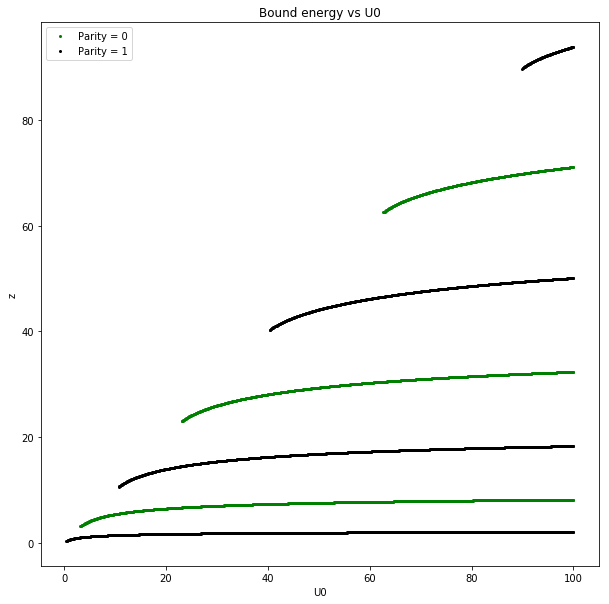

In [42]:
main()

Question 3


In [5]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------
#
# Define the problem.

def U(x):
    return x**2

def deriv2(x, y):
    return -1*(y[2] - U(x))*y[0]				# y[2] is the eigenvalue z

# Boundary conditions.



BC_a = 0
BC_b = 6
U0 = U(BC_b)


# Integration step and bisection tolerance.

dx = 0.01
tol = 1.e-4

#

#-----------------------------------------------------------------------

def f(x, y):
    return np.array([y[1], deriv2(x, y), 0.]) 	# z' = 0

def rk4_step(func, x, y, dx):
    dy1 = dx*func(x, y)
    dy2 = dx*func(x+0.5*dx, y+0.5*dy1)
    dy3 = dx*func(x+0.5*dx, y+0.5*dy2)
    dy4 = dx*func(x+dx, y+dy3)
    y += (dy1 + 2*dy2 + 2*dy3 + dy4)/6.
    x += dx
    return x, y

def integrate(func, a, ya, ypa, z, b, dx):
    x = a
    y = np.array([ya, ypa, z])			# z is the eigenvalue
    while x < b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
    return x, y

def g(z):
    eta = np.sqrt(max((U0-z), 0))
    x, y = integrate(f, 0.0, parity, 1-parity, z, BC_b, dx)
    return y[1] + eta * y[0]

def bisect(func, zl, zr, tol):
    n = 0
    while zr-zl > tol:
#         print('zr = {}, zl = {}'.format(zr, zl))
        zm = 0.5*(zl + zr)
        if func(zm)*func(zl) > 0:
            zl = zm
        else:
            zr = zm
        n += 1

    return n,zl,zr

def secant1(g, zl, zr):
    gl = g(zl)
    gr = g(zr)
    
#     print('gl = {}, gr = {}'.format(gl, gr))
    return zl + (zr-zl)*(-gl)/(gr-gl)

def plotz(f, z):
    x = a
    y = np.array([BC_ya, 1.0, z])
    xx = [x]
    yy = [y[0]]
    while x < BC_b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
        xx.append(x)
        yy.append(y[0])
    plt.plot(xx, yy, label='z = {:.3f}'.format(z))
    plt.xlim(BC_a, BC_b)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot([BC_a], [BC_ya], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')
    plt.plot([BC_b], [BC_yb], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')

def main():
    
    fig, ax = plt.subplots(1, 1, figsize = (10,10))
    ax.set(xlabel = 'x', ylabel = 'y', title = 'Q3 Eigenfunctions')
    plt.plot()
    parity_vals = [0.0, 1.0] 
    plt.plot([0, 4], [0,0], 'k-')

    
    global parity
    for val in parity_vals:
        parity = val
        number_of_eigs = 0
        
        zl = 0.0
        zr = U0
        
        n = 100
        zz = np.linspace(zl, zr, n)
        gg = np.zeros(n)
        for i in range(n):
            gg[i] = g(zz[i])
    
        i = 0
        
        temp_zl = zz[i]
        temp_gl = gg[i]
        temp_zr = 0
        temp_gr = 0
        root_list = []
        root_pos_list = []

        
        while number_of_eigs != 5:   
            i += 1
            if i == n-1:
                print('Found all solutions')
                break
            if (np.sign(gg[i]) != np.sign(temp_gl)):
                number_of_eigs += 1

                if gg[i] == 0:
                    root_list.append(gg[i])
                else:
                    temp_zr = zz[i]
                    m,zzl,zzr = bisect(g, temp_zl, temp_zr, 1.e-6)
                    zs = secant1(g, zzl, zzr)
                    root_list.append(zs)    
                    print('z =', zs, 'g(z) =', g(zs), 'With Parity = ',parity)

                
                temp_zl = zz[i]
                temp_gl = gg[i]
                
        for z_i in root_list:
            x = BC_a
            y = np.array([parity, 1-parity, z_i])
            xx = [x]
            yy = [y[0]]
            while x < BC_b-0.05*dx:
                x, y = rk4_step(f, x, y, dx)
                xx.append(x)
                yy.append(y[0])
            if parity == 1.0:
                plt.plot(xx, yy, label = 'z = {}, parity = {}'.format(z_i, parity))
            else:
                plt.plot(xx, yy, '--', label = 'z = {}, parity = {}'.format(z_i, parity))


            
#             n,zzl,zzr = bisect(g, zl, zr, 1.e-6)
#             zs = secant1(g, zzl, zzr)

# #                 if parity == 1.0:
# #                     ax.plot(U0, zs, 'ko', markersize = 2, label = 'Parity = 1')
# #                 else:
# #                     ax.plot(U0, zs, 'go', markersize = 2, label = 'Parity = 0')

#             print('z =', zs, 'g(z) =', g(zs), 'With Parity = ',parity)
#             zl = zs
            
        

            
    ax.legend()
    plt.savefig('Q3.jpg')

z = 3.0000000015624444 g(z) = -6.733281948515921e-07 With Parity =  0.0
z = 7.0000000182235125 g(z) = 1.8551554062214083e-08 With Parity =  0.0
z = 11.000000069503635 g(z) = -7.763559645688773e-10 With Parity =  0.0
z = 15.000000138499507 g(z) = 4.5152779518803365e-11 With Parity =  0.0
z = 18.99999832473207 g(z) = -1.5462310251623812e-12 With Parity =  0.0
z = 1.0000000001042224 g(z) = -3.6481917467254646e-06 With Parity =  1.0
z = 5.0000000067696275 g(z) = 8.796875991325283e-08 With Parity =  1.0
z = 9.000000038399497 g(z) = -2.681549573157419e-09 With Parity =  1.0
z = 13.000000110962354 g(z) = 1.1600619987187089e-10 With Parity =  1.0
z = 16.999999957368722 g(z) = -6.164750827875043e-11 With Parity =  1.0


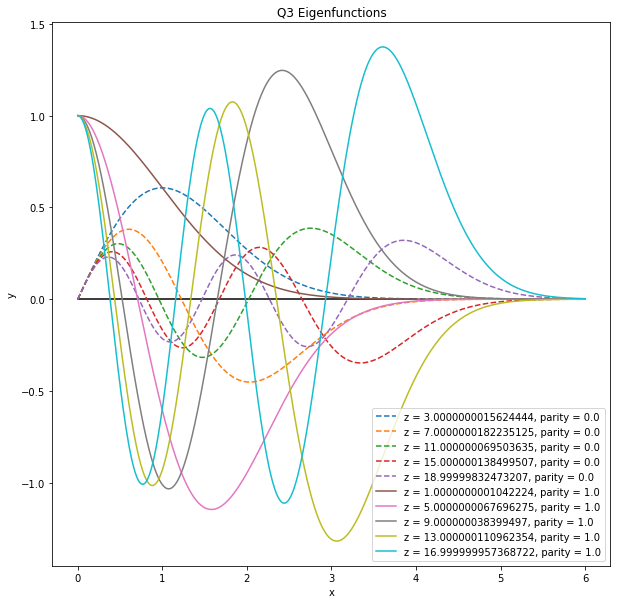

In [6]:
main()

Question 4

In [185]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------
#
# Define the problem.

def U(x):
    return -1*np.exp(-1*np.sqrt(abs(x)))

def deriv2(x, y):
    return -1*(y[2] - U(x))*y[0]				# y[2] is the eigenvalue z

# Boundary conditions.



BC_a = 0
BC_b = 25
U0 = U(BC_b)


# Integration step and bisection tolerance.

dx = 0.01
tol = 1.e-4

#

#-----------------------------------------------------------------------

def f(x, y):
    return np.array([y[1], deriv2(x, y), 0.]) 	# z' = 0

def rk4_step(func, x, y, dx):
    dy1 = dx*func(x, y)
    dy2 = dx*func(x+0.5*dx, y+0.5*dy1)
    dy3 = dx*func(x+0.5*dx, y+0.5*dy2)
    dy4 = dx*func(x+dx, y+dy3)
    y += (dy1 + 2*dy2 + 2*dy3 + dy4)/6.
    x += dx
    return x, y

def integrate(func, a, ya, ypa, z, b, dx):
    x = a
    y = np.array([ya, ypa, z])			# z is the eigenvalue
    while x < b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
    return x, y

def g(z):
    eta = np.sqrt(max((U0-z), 0))
    x, y = integrate(f, 0.0, parity, 1-parity, z, BC_b, dx)
    return y[1] - np.sqrt(2.0)*x*y[0]
#     return y[1] + eta * y[0]

def bisect(func, zl, zr, tol):
    n = 0
    while zr-zl > tol:
#         print('zr = {}, zl = {}'.format(zr, zl))
        zm = 0.5*(zl + zr)
        if func(zm)*func(zl) > 0:
            zl = zm
        else:
            zr = zm
        n += 1

    return n,zl,zr

def secant1(g, zl, zr):
    gl = g(zl)
    gr = g(zr)
    
#     print('gl = {}, gr = {}'.format(gl, gr))
    return zl + (zr-zl)*(-gl)/(gr-gl)

def plotz(f, z):
    x = a
    y = np.array([BC_ya, 1.0, z])
    xx = [x]
    yy = [y[0]]
    while x < BC_b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
        xx.append(x)
        yy.append(y[0])
    plt.plot(xx, yy, label='z = {:.3f}'.format(z))
    plt.xlim(BC_a, BC_b)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot([BC_a], [BC_ya], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')
    plt.plot([BC_b], [BC_yb], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')

def main():
    
    fig, ax = plt.subplots(1, 1, figsize = (10,10))
    ax.set(xlabel = 'x', ylabel = 'y', title = 'Q4 Eigenfunctions')
#     plt.plot([0, 6], [0,0], 'k-')


    parity_vals = [0.0, 1.0]
    
    
    global U0, parity

    for val in parity_vals:
        parity = val
        U0 = 0.0
   
        #Different Integrator        
        zl = -1
        zr = -1 + 1e-4
        temp_gl = g(zl)
        temp_gr = g(zr)
        root_list = []
        while zr <= U0+1e-5/2:
            if np.sign(temp_gl) != np.sign(temp_gr):
                if temp_gr == 0:
                    print('z =', zs, 'g(z) =', g(zs),'With Parity = ',parity)
                    root_list.append(temp_gr)
                else:
                    m,zzl,zzr = bisect(g, zl, zr, 1.e-6)
                    zs = secant1(g, zzl, zzr)
                    print('z =', zs, 'g(z) =', g(zs),'With Parity = ',parity)                 
                    root_list.append(zs)
                zl = zr
                zr = zl + .01
                temp_gl = temp_gr

            else:
                zr += .01
                temp_gr = g(zr)
                
        for z_i in root_list:
            x = BC_a
            y = np.array([parity, 1-parity, z_i])
            xx = []
            yy = []
#             xx = [x]
#             yy = [y[0]]
            
            while x > -1*BC_b+0.5*dx:
                x, y = rk4_step(f, x, y, -1*dx)
#                 xx.append(x)
#                 yy.append(y[0])
            
            while x < BC_b-0.5*dx:
                x, y = rk4_step(f, x, y, dx)
                xx.append(x)
                yy.append(y[0])

            

            if parity == 1.0:
#                 xx += [-x for x in xx]
#                 yy += [y for y in yy]
                plt.plot(xx, yy, '-', label = 'z = {}, parity = {}'.format(z_i, parity))
            else:
#                 xx += [-x for x in xx]
#                 yy += [-y for y in yy]
                plt.plot(xx, yy, '--', label = 'z = {}, parity = {}'.format(z_i, parity))



   
    ax.legend()
    plt.savefig('Q4.jpg')

z = -0.05794119998551664 g(z) = 3.592911172779767e-07 With Parity =  0.0
z = -0.30056741482884836 g(z) = 2.7402384781025e-05 With Parity =  1.0
z = -0.019991071771046025 g(z) = -3.2706197278242755e-08 With Parity =  1.0


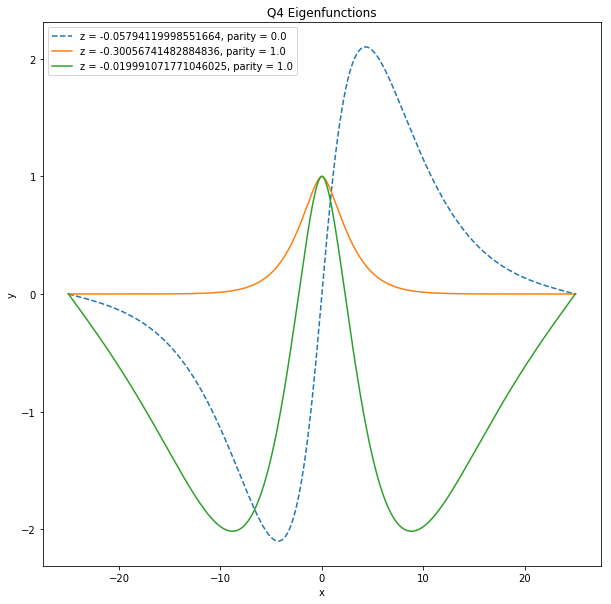

In [186]:
main()

In [116]:
np.sign(1)

1

In [107]:
a = [1,2,3]
a = a + -1*a
a

[1, 2, 3]

In [ ]:
    
#     global parity
#     for val in parity_vals:
#         parity = val
        
#         zl = -1.0
#         zr = 0.0
#         n = 200
#         zz = np.linspace(zl, zr, n)
#         gg = np.zeros(n)
#         for i in range(n):
#             gg[i] = g(zz[i])
    
#         i = 0
        
#         temp_zl = zz[i]
#         temp_gl = gg[i]
#         temp_zr = 0
#         temp_gr = 0
#         root_list = []
#         root_pos_list = []

        
#         while i != n-1:   
#             i += 1
#             if (np.sign(gg[i]) != np.sign(temp_gl)):
#                 if gg[i] == 0:
#                     root_list.append(gg[i])
#                 else:
#                     temp_zr = zz[i]
#                     m,zzl,zzr = bisect(g, temp_zl, temp_zr, 1.e-6)
#                     zs = secant1(g, zzl, zzr)
#                     root_list.append(zs)    
#                     print('z =', zs, 'g(z) =', g(zs), 'With Parity = ',parity)

                
#                 temp_zl = zz[i]
#                 temp_gl = gg[i]
                
#         for z_i in root_list:
#             x = BC_a
#             y = np.array([parity, 1-parity, z_i])
#             xx = [x]
#             yy = [y[0]]
#             while x < BC_b-0.5*dx:
#                 x, y = rk4_step(f, x, y, dx)
#                 xx.append(x)
#                 yy.append(y[0])
#             if parity == 1.0:
#                 plt.plot(xx, yy, label = 'z = {}, parity = {}'.format(z_i, parity))
#             else:
#                 plt.plot(xx, yy, '--', label = 'z = {}, parity = {}'.format(z_i, parity))


            